## Linear Regression machine learning

### In this notebook we shall we deploying a multilinear regression model with data pre-processing and feature engineering. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [24]:
#Importing the data
df = pd.read_csv('winequality-red.csv')
df.info() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Here I am analysing the dataset to observe what the most appropriate feature engineering techniques would be to apply to the dataset before creating the Linear Regression model and to examine which forms of data pre-processing will be required.

In [25]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


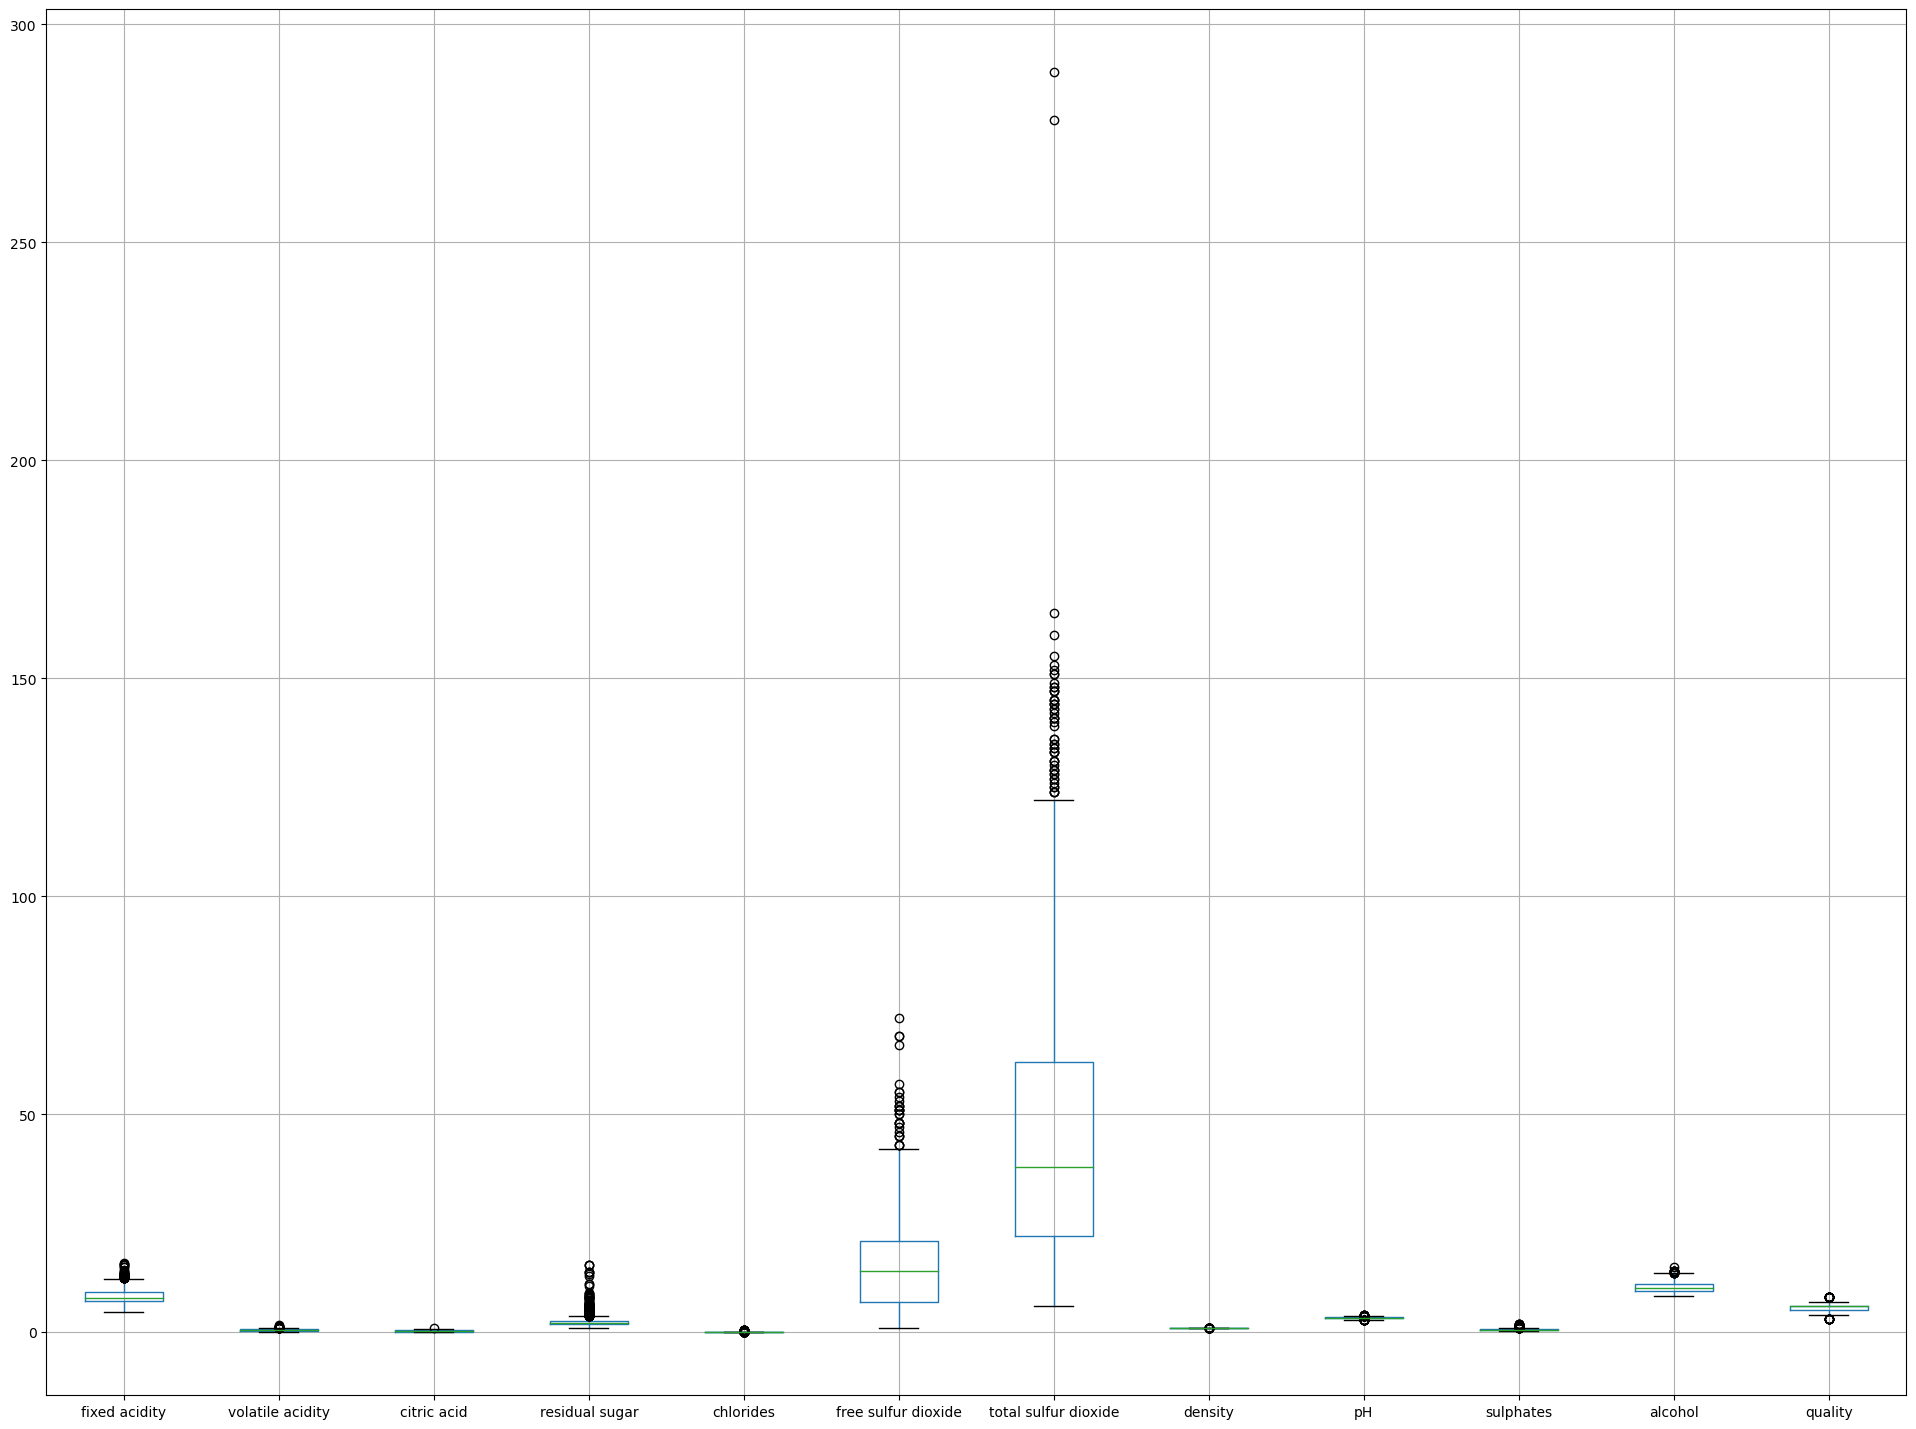

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


In [26]:
df.boxplot(figsize=(24,18))
plt.show()
print(df.skew())

## Data pre-processing

#### Feature selection is an important step for the creation of any machine learning model, but before we do this we must remove outliers and skewness from our data in order to ensure that any present outliers or skewness does not impact the feature selection through distorting the important correlations that may be present in our dataset.

### Starting outlier removal

In [27]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

for i in ['alcohol', 'quality', 'pH', 'total sulfur dioxide', 'residual sugar', 'fixed acidity', 'free sulfur dioxide', 'volatile acidity', 'chlorides', 'sulphates', 'citric acid', 'density']:
    lw,uw= whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

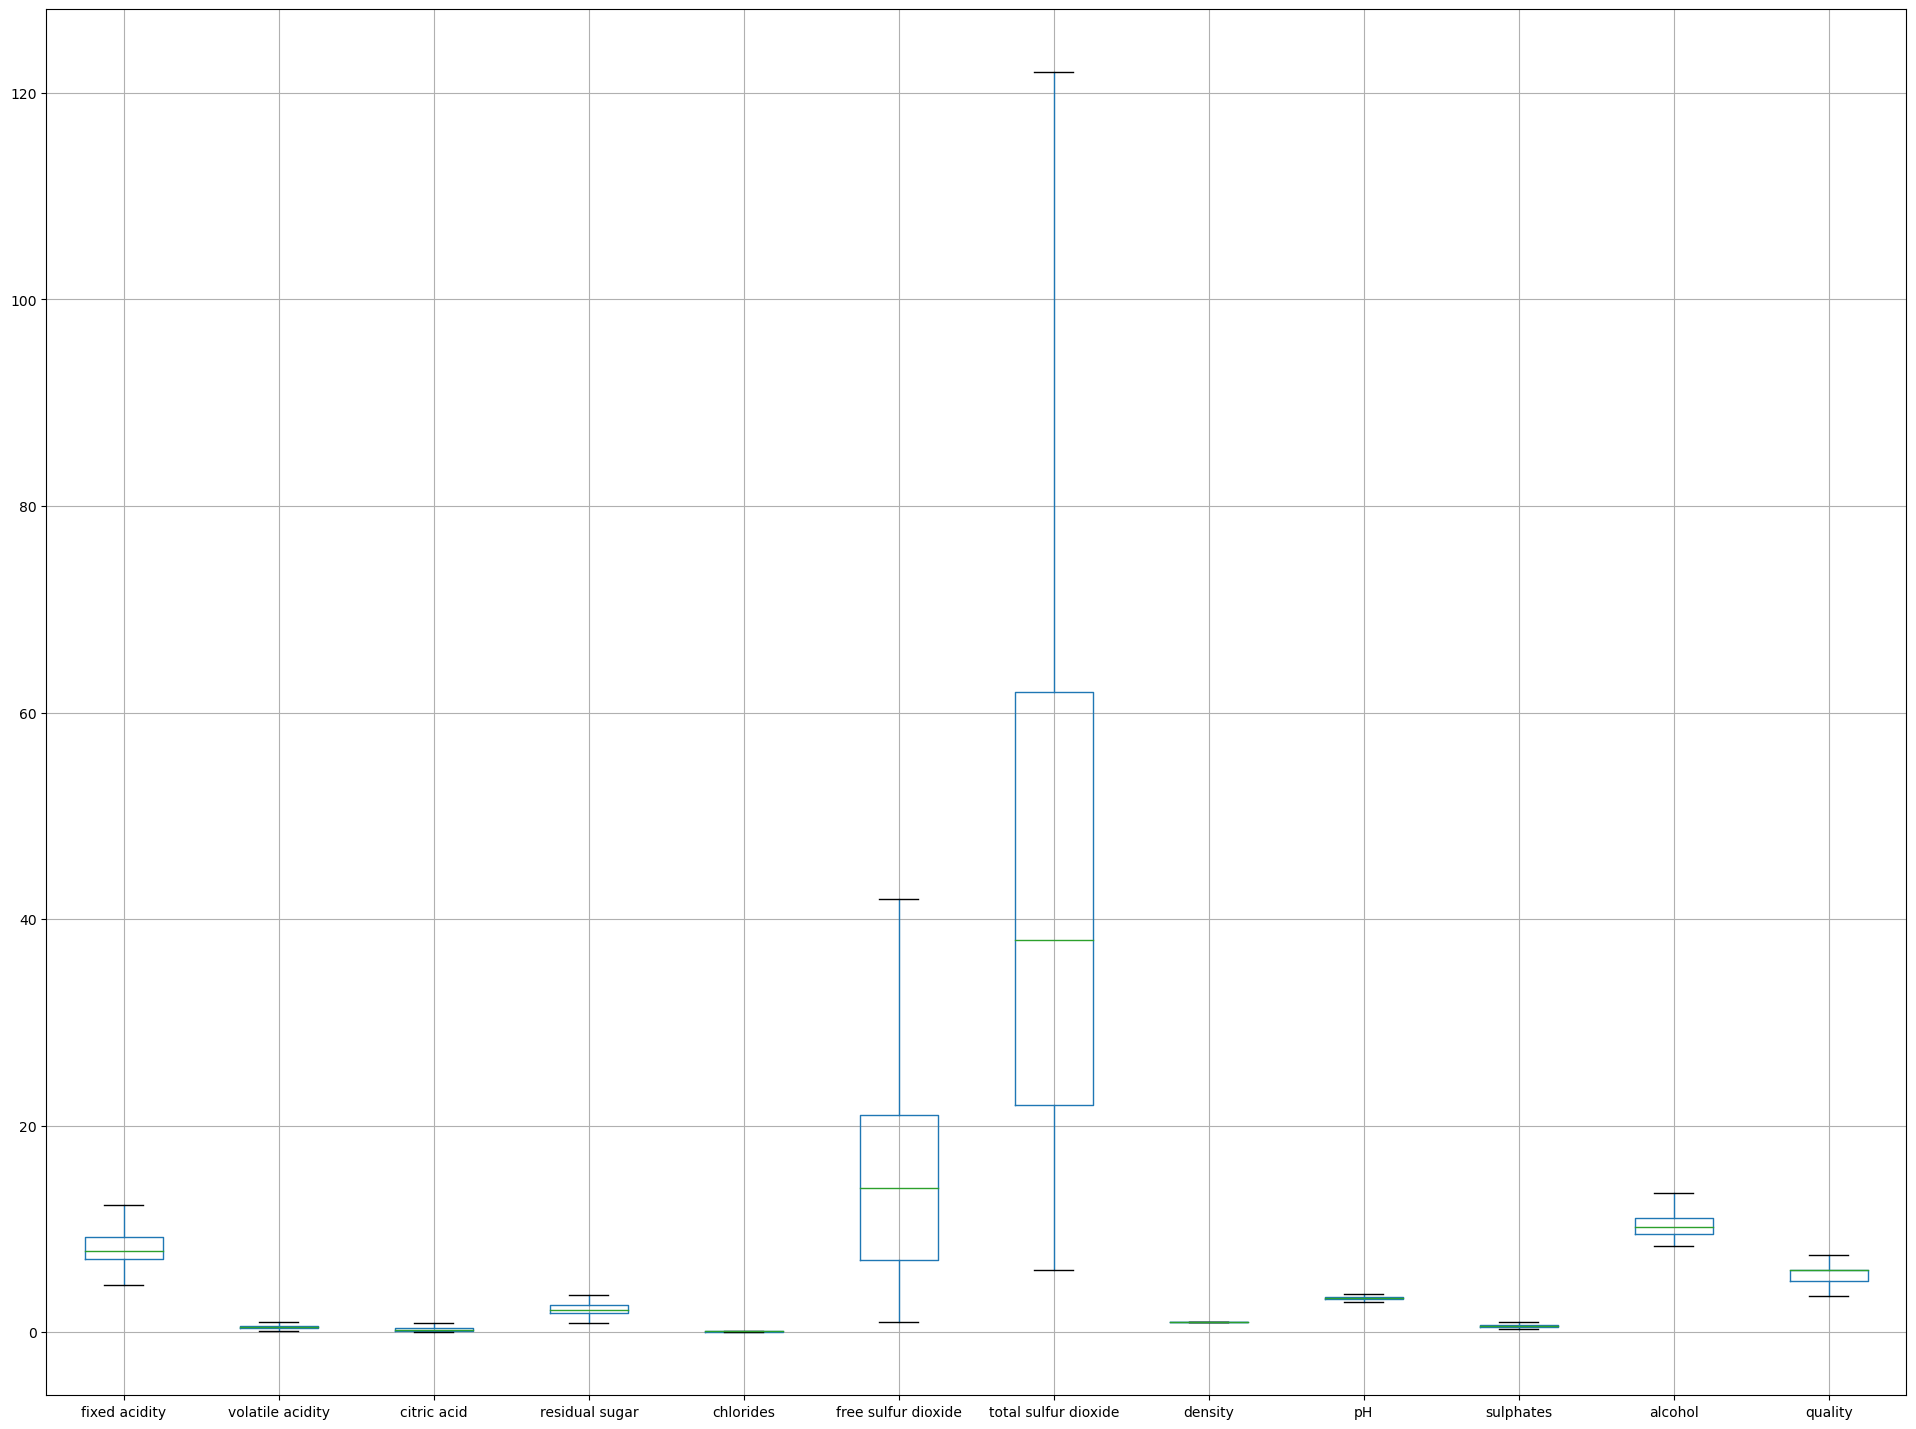

In [30]:
df.boxplot(figsize=(24,18))
plt.show()

#### Here we can observe that outliers have been replaced with values in our dataset for using either the values that were present for the lower whisker or upper whiskers, and this boxplot has been created to observe these changes.

### Handling skewness using transformation

   #### Now we will handle the skewness that was apparent in our data using Log transfomations.

In [31]:
for i in ['chlorides', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']:
    df[i] = np.log(df[i] + 1)
    
print(df.skew())

fixed acidity           0.700363
volatile acidity        0.420928
citric acid             0.309850
residual sugar          0.477235
chlorides               0.385829
free sulfur dioxide    -0.160046
total sulfur dioxide   -0.106099
density                 0.025021
pH                      0.054017
sulphates               0.597421
alcohol                 0.795429
quality                 0.202040
dtype: float64


#### We can now observe that the log transformation has removed the highly positive skew that was present for the chosen variables, and made them much closer to 0, being symmetrical.

## Feature selection

### To determine the best features to use to create any models, one must observe the variables which have the high correlation and high variance, and to keep the model simple we will only be using one independent variable for our model

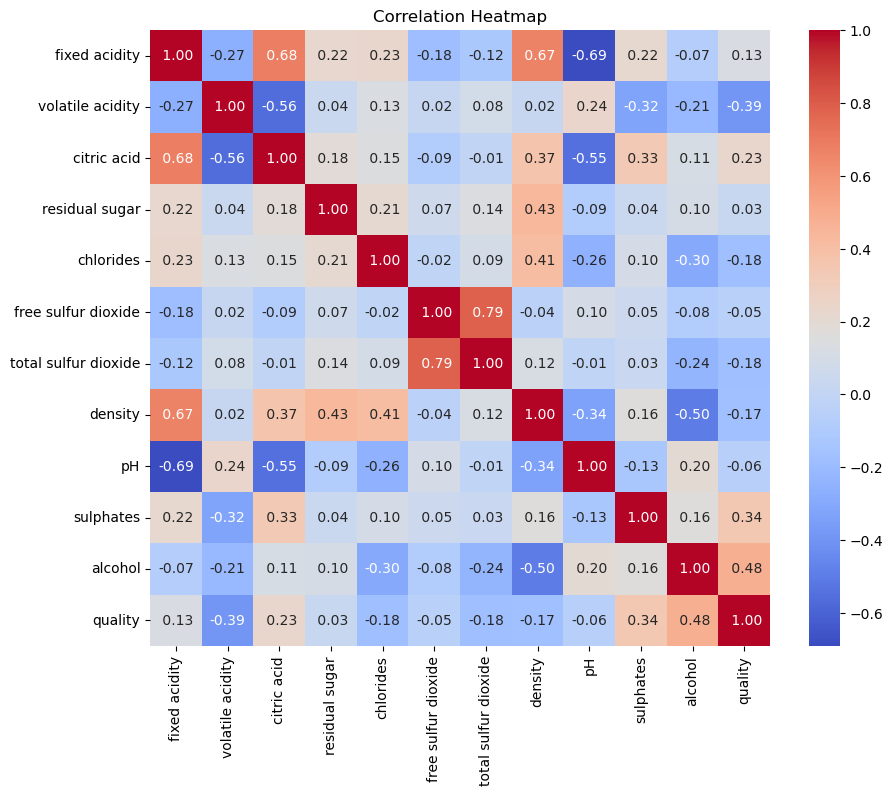

fixed acidity           2.741871
volatile acidity        0.030292
citric acid             0.037874
residual sugar          0.030767
chlorides               0.000270
free sulfur dioxide     0.379690
total sulfur dioxide    0.452149
density                 0.000003
pH                      0.022455
sulphates               0.006568
alcohol                 1.112619
quality                 0.613419
dtype: float64


In [41]:
correlation_matrix =df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm", fmt =' .2f')
plt.title("Correlation Heatmap")
plt.show()

variance = df.var()
print(variance)

### Building the Linear Regression model

In [34]:
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'chlorides', 'density', 'fixed acidity' ]].values
Y = df['quality'].values 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = linear_model.LinearRegression()

In [36]:
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
Y_pred = model.predict(X_test)

In [38]:
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(Y_test, Y_pred))
print('R^2: %.2f'
     % r2_score(Y_test, Y_pred))

Mean squared error (MSE): 0.37
R^2: 0.43


In [39]:
residual = Y_test - Y_pred

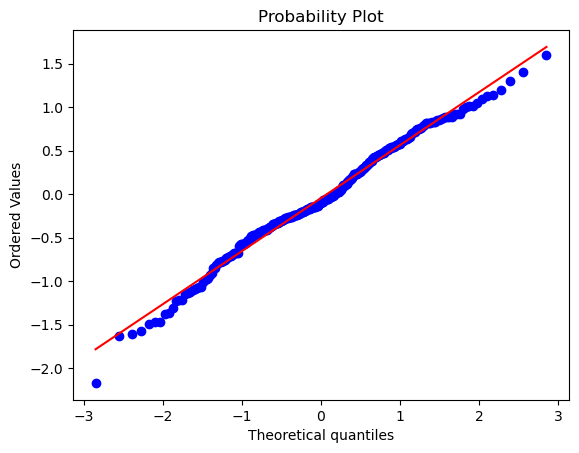

In [40]:
import pylab 
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
pylab.show()